In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins

In [108]:
## Creating the dfs from csv ##

crime_data_df = pd.read_csv("../data/crime.csv")
crime_data_df.describe

crime_data_sample_df = pd.read_csv("../data/crime.csv").sample(500)
crime_data_sample_df

offense_codes_df = pd.read_csv("../data/offense_codes.csv")

In [99]:
## Adding 'Year' and 'Month' columns to df ##

crime_data_sample_df.drop("LAST_OCCURRENCE_DATE", axis=1)
crime_data_sample_df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(crime_data_sample_df['FIRST_OCCURRENCE_DATE'])
crime_data_sample_df['OCCURRENCE YEAR'] = crime_data_sample_df['FIRST_OCCURRENCE_DATE'].dt.year
crime_data_sample_df['OCCURRENCE MONTH'] = crime_data_sample_df['FIRST_OCCURRENCE_DATE'].dt.month
crime_data_sample_df.sort_values('incident_id')

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OCCURRENCE YEAR,OCCURRENCE MONTH
32082,2020887,2020887299902,2999,2,criminal-mischief-graffiti,public-disorder,2019-12-25 08:00:00,1/1/2020 8:15:00 AM,1/1/2020 9:27:00 AM,2001 S JULIAN CIR,...,1672929.0,-105.031317,39.680054,4.0,421.0,harvey-park,1,0,2019,12
171003,20179789,20179789544100,5441,0,traffic-accident,traffic-accident,2017-01-05 17:15:00,NaN,1/5/2017 6:00:00 PM,E 1ST AVE / N UNIVERSITY BLVD,...,1686964.0,-104.959222,39.718275,3.0,311.0,cherry-creek,0,1,2017,1
276544,20192888,20192888131500,1315,0,aggravated-assault,aggravated-assault,2018-12-24 13:14:00,NaN,1/2/2019 1:34:00 PM,7305 E 36TH AVE,...,1705024.0,-104.902286,39.767580,5.0,512.0,central-park,1,0,2018,12
366624,20193434,20193434230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2018-12-27 02:00:00,12/28/2018 3:00:00 AM,1/2/2019 7:43:00 PM,901 N SHERMAN ST,...,1691497.0,-104.985507,39.730838,6.0,623.0,capitol-hill,1,0,2018,12
190183,20195982,20195982544100,5441,0,traffic-accident,traffic-accident,2019-01-03 17:43:00,NaN,1/3/2019 5:43:00 PM,I70 HWYEB / N CENTRAL PARK BLVD,...,1708542.0,-104.882975,39.777138,5.0,512.0,central-park,0,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390148,20216023738,20216023738239900,2399,0,theft-other,larceny,2021-12-02 19:05:00,12/2/2021 9:00:00 PM,12/6/2021 2:05:00 PM,1910 S JOSEPHINE ST,...,1673662.0,-104.957773,39.681751,3.0,314.0,university-park,1,0,2021,12
411364,20216025503,20216025503239901,2399,1,theft-bicycle,larceny,2021-12-30 11:00:00,12/30/2021 11:50:00 AM,12/30/2021 1:06:00 PM,1100 BLK N PENNSYLVANIA ST,...,1692746.0,-104.981549,39.734249,6.0,623.0,capitol-hill,1,0,2021,12
456913,20226000502,20226000502230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2022-01-09 23:45:00,1/10/2022 8:00:00 AM,1/10/2022 9:21:00 AM,3131 W MEXICO AVE,...,1675278.0,-105.026428,39.686484,4.0,421.0,mar-lee,1,0,2022,1
465400,20226002485,20226002485299901,2999,1,criminal-mischief-mtr-veh,public-disorder,2022-02-09 12:00:00,2/9/2022 2:56:00 PM,2/9/2022 3:40:00 PM,1901 E BUCHTEL BLVD,...,1674662.0,-104.963700,39.684523,3.0,313.0,university,1,0,2022,2


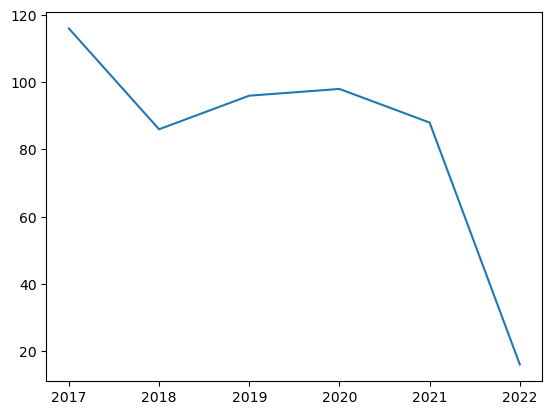

In [101]:
## Total Crime per Year ##

crimes_per_year = crime_data_sample_df['OCCURRENCE YEAR'].value_counts().sort_index()
crimes_per_year

fig, ax = plt.subplots()

ax.plot(crimes_per_year)


<BarContainer object of 7 artists>

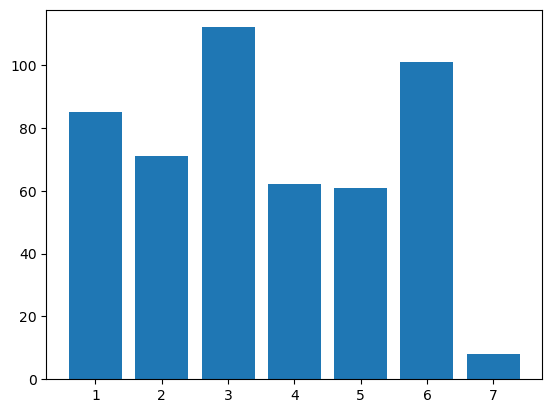

In [102]:
## Amount of Crime by Precinct ##

x = crime_data_sample_df.groupby('DISTRICT_ID').count()
x

fig, ax = plt.subplots()

ax.bar(x.index, x['incident_id'])

In [111]:
## Cleaning up lat/long data ##

y = crime_data_sample_df[['GEO_LAT', 'GEO_LON']]
y.dropna(inplace=True)

denver_crime_heatmap = folium.Map()
denver_crime_heatmap.add_child(plugins.HeatMap(data=y))
denver_crime_heatmap


/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_2022/3762612822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)
